# Statistics 1 : OpenSubtitle dialogues-based

**Input :** dataset_cleaned.csv & dataset_token_cleaned.csv

**Main :** Basics statistics on the dialogues-based structure



In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import plot
import time
import pickle
import nltk

In [19]:
data        = pd.read_csv("dataset_cleaned.csv")
data_words  = pd.read_csv('dataset_token_cleaned.csv')

---Execution time :  91.32977414131165 seconds ---


In [21]:
# Replace NAN per _ 
data.Text.fillna(" ",inplace=True)

## Part 1. Global Information dataset :

In [4]:
# Number of dialog
print("Number of Dialog:",  data['Num_dialog'].iloc[-1])
# Total number of sentences
print("Number of sentences:",  data.shape[0] )

Number of Dialog: 8820645
Number of sentences: 119666109


In [21]:
# Replace NAN per _ 
data.Text.fillna(" ",inplace=True)

In [22]:
#number of sentences for each dialogs
Result1 = data["Num_dialog"].value_counts().value_counts().sort_index().to_frame().rename_axis("# sentences").rename(columns={0: '#Dialogs'})
# Doing one more value_count will give the expected result
Result1["%"] = Result1["Num_dialog"]/data['Num_dialog'].iloc[-1] *100
Result1["Cumulative %"] = Result1["%"].cumsum()
Result1.drop(["%"], axis=1, inplace = True)
#To get the cumulative
#cumsum = Result["%"].cumsum()


In [26]:
Result1.head(-1)

,Num_dialog,Cumulative %
# sentences,,
1,1543823,17.502382
2,1051345,29.421522
3,715138,37.529070
4,557098,43.844912
5,444603,48.885393
...,...,...
5630,1,99.999943
5678,1,99.999955
5690,1,99.999966


In [17]:
# Mean sentences. Max number of sentences
print( "Total Number of dialogs : ", Info[0])
print( "Average Number of sentences per dialogs: ", Info[1])
print( "Standard deviation of sentences per dialogs: ", Info[2])
print("Min number of sentences in a dialogs:",Info[3])
print("Max number of sentences in a dialogs:",Info[7])

Total Number of sentences :  8820645.0
Average Number of sentences per dialogs:  13.566593939558842
Standard deviation of sentences per dialogs:  25.509508961344476
Min number of sentences in a dialogs: 1.0
Max number of sentences in a dialogs: 8334.0


In [37]:
print("Dialogs from 1 to 20 sentences represent ",Result1["Cumulative %"][20]," % of the all corpus")

Dialogs from 1 to 20 sentences represent  81.06093148516918  % of the all corpus


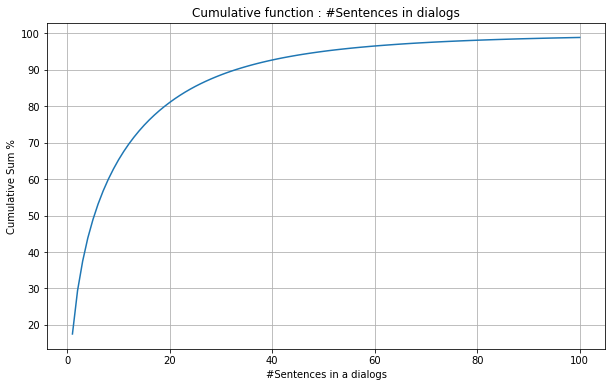

In [31]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(Result1["Cumulative %"][0:100])

ax.set(xlabel='#Sentences in a dialogs', ylabel='Cumulative Sum %',
       title='Cumulative function : #Sentences in dialogs')
ax.grid()

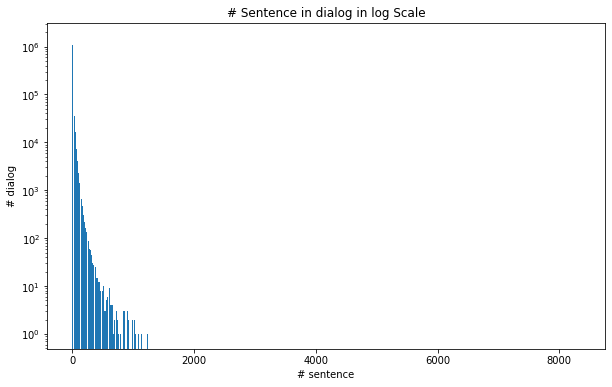

In [40]:
Sentences= Result1.index.values.tolist()
fig,ax = plt.subplots(figsize=(10, 6))

plt.bar(Sentences,Result1["Num_dialog"])

ax.set_yscale('log')
plt.xlabel('# sentence')
plt.ylabel('# dialog')
plt.title('# Sentence in dialog in log Scale')
plt.show()

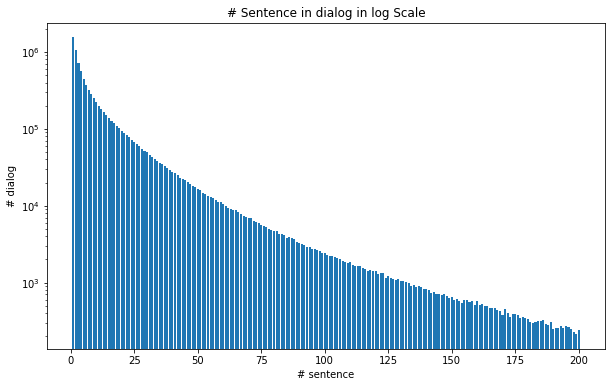

In [41]:
Sentences= Result1.index.values.tolist()
fig,ax = plt.subplots(figsize=(10, 6))

plt.bar(Sentences[0:200],Result1["Num_dialog"][0:200])

ax.set_yscale('log')
plt.xlabel('# sentence')
plt.ylabel('# dialog')
plt.title('# Sentence in dialog in log Scale')
plt.show()

## Part 2. Turn lenght Analysis

In [62]:
data_words.Size.replace(0, 1, inplace = True)

In [63]:
Result2 = data_words["Size"].value_counts().sort_index().to_frame().rename_axis("#Words").rename(columns={"Size": '#Sentences'})

In [65]:
Result2["%"] = Result2["#Sentences"]/data.shape[0]*100
Result2["Cumulative %"] = Result2["%"].cumsum()
Result2.drop(["%"], axis=1, inplace = True)
Result2

,#Sentences,Cumulative %
#Words,,
1,1785196,1.491814
2,14378015,13.506925
3,8846070,20.899218
4,12702821,31.514438
5,13115421,42.474451
...,...,...
492,1,99.999995
586,1,99.999996
598,1,99.999997


In [32]:
Info2=data_words.Size.describe()

In [33]:
print( "Total Number of words : ", Info2[0])
print( "Average Number of words per sentences: ", Info2[1])
print( "Standard deviation of #words per sentences: ", Info2[2])
print("Min number of words in a sentence:",Info2[3])
print("Max number of words in a sentences:",Info2[7])

Total Number of words :  119666109.0
Average Number of words per sentences:  7.353662965677275
Standard deviation of #words per sentences:  5.192873947083736
Min number of words in a sentence: 0.0
Max number of words in a sentences: 1090.0


In [70]:
print("sentences from 1 to 29 words represent ",Result2["Cumulative %"][29]," % of the all corpus")

sentences from 1 to 29 words represent  99.401889134709  % of the all corpus


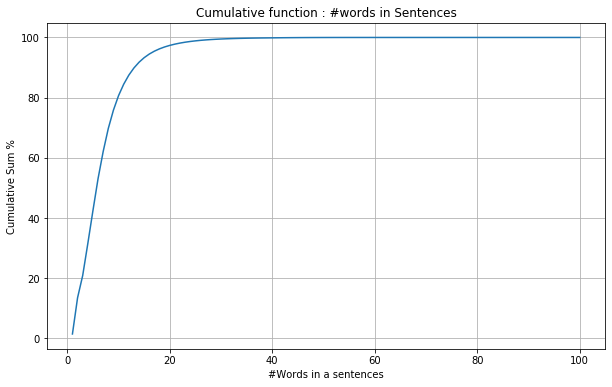

In [71]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(Result2["Cumulative %"][0:100])

ax.set(xlabel='#Words in a sentences', ylabel='Cumulative Sum %',
       title='Cumulative function : #words in Sentences')
ax.grid()

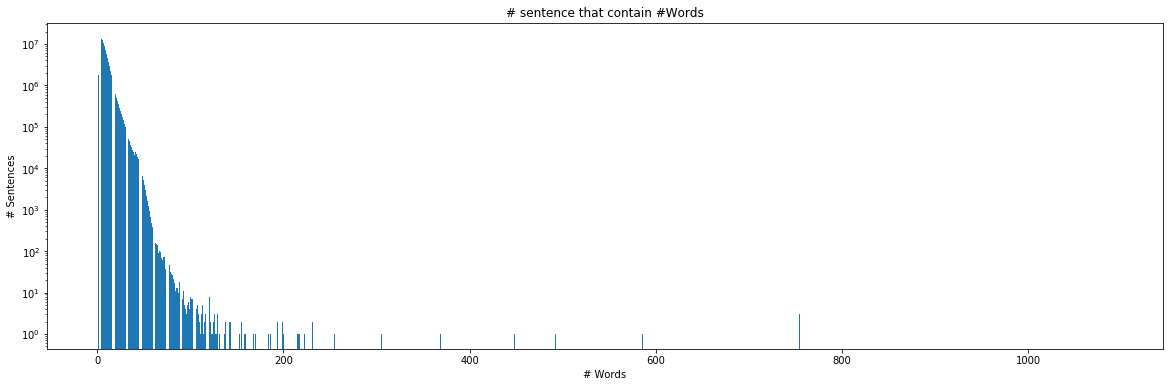

In [72]:
Words= Result2.index.values.tolist()
fig,ax = plt.subplots(figsize=(20, 6))

plt.bar(Words,Result2["#Sentences"])

ax.set_yscale('log')
plt.xlabel('# Words')
plt.ylabel('# Sentences')
plt.title('# sentence that contain #Words')
plt.show()

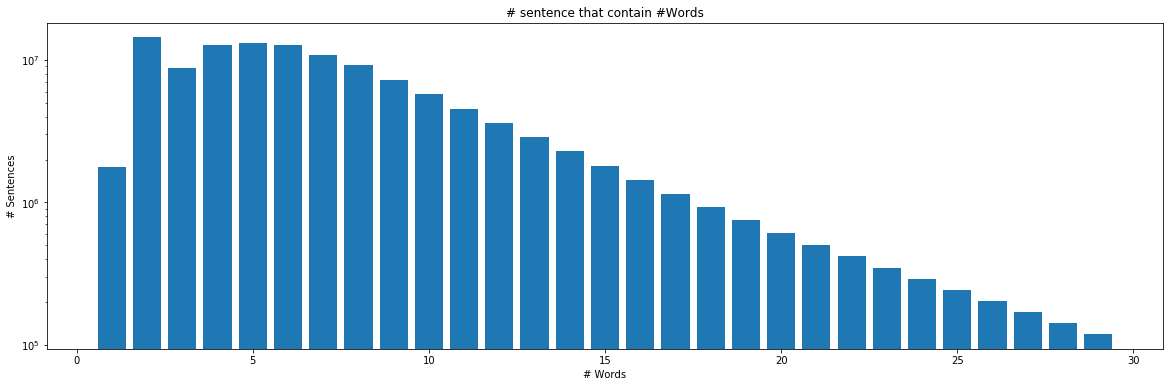

In [74]:
Words= Result2.index.values.tolist()
fig,ax = plt.subplots(figsize=(20, 6))

plt.bar(Words[0:29],Result2["#Sentences"][0:29])

ax.set_yscale('log')
plt.xlabel('# Words')
plt.ylabel('# Sentences')
plt.title('# sentence that contain #Words')
plt.show()